# Draft 1
## Diego Díaz Ayala 
## A01770236

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
data = pd.read_csv("dataus2023.csv")
data.shape

firms = pd.read_csv("firmsus2023.csv")
firms.shape

(5615, 7)

In [3]:
firms.head(10)

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.100,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos
5,AAL,American Airlines Group Inc,activo,0.028,"Transportes, correos y almacenamiento",Transporte aéreo regular,Transporte Servic
6,AAME,Atlantic American Corp,activo,NaN,Servicios financieros y de seguros,Instituciones de seguros,Finanzas y Seguros
7,AAOI,"Applied Optoelectronics, Inc",activo,NaN,Industrias manufactureras,Fabricación de componentes electrónicos,Electroelectronic
8,AAON,"Aaon, Inc",activo,NaN,Industrias manufactureras,"Fabricación de equipo de aire acondicionado, c...",Maquinaria Indust
9,AAP,"Advance Auto Parts, Inc",activo,0.011,Comercio al por menor,"Tienda de repuestos, accesorios y llantas",Comercio


In [4]:
data['qdate']= pd.PeriodIndex(data.q, freq='Q')
data.set_index(["firm","qdate"], inplace=True)

print(data.head(10))
#data.index

                  q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q1  2000q1          NaN         NaN        NaN        NaN   
     2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
     2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
     2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
     2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
     2001Q2  2001q2          6.0   4930000.0  2683000.0  2025000.0   
     2001Q3  2001q3          9.0   6736000.0  3829000.0  3027000.0   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.0   
     2002Q1  2002q1          3.0   1426000.0   878000.0   990000.0   
     2002Q2  2002q2          6.0   2883000.0  1732000.0  1942000.0   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     

## 1.1 Calculation of financial variables and ratios

You have to create new variables (columns) in the dataset related to important financial variables and ratios:

In [5]:
firms.columns
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
firms1.columns = ['firm', 'Empresa', 'status', 'industria']
data = pd.merge(data, firms1, on="firm", how='left')

In [6]:
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

In [7]:
graf_ry = data['ry']
graf_ry = graf_ry.fillna(graf_ry.mean())

In [8]:
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']
data['f1rq'] = data['rq'].shift(-1)
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])
data['acidratio'] = np.where(data['currentliabilities']==0,np.NaN,data['currentassets'] / data['currentliabilities'])
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']
data['bookvalue'] = data['totalassets'] * data['totalliabilities']

## 1.2 Firm Composition of the US financial market

Considering the most recent financial quarter of the dataset:

* Show how many active firms by industry there are in the sample

* For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

* Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

* Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?


### - Show how many active firms by industry there are in the sample.

In [9]:
pd.options.display.float_format = '{:,.2f}'.format
active_2023q2 = data.loc[(data['status'] == "activo") & (data['q'] == "2023q2")]

a = active_2023q2[['industria', 'firm']].groupby('industria').count()
a.head(10)



,firm
industria,
-,2
"Agricultura, ganadería, aprovechamiento forestal, pesca y caza",17
Comercio al por mayor,79
Comercio al por menor,145
Construcción,46
"Empresas de electricidad, gas y agua",77
Industrias manufactureras,1540
Información en medios masivos,256
"Minería, explotación de canteras y extracción de petróleo y gas",113


In [10]:
industrysummary=active_2023q2.groupby('industria').agg(
{ 'firm':['count'],
 'mvalue':['min','max','median','std','mean'],'bookvalue':['min','max','median','std']}
)
industrysummary

firm       mvalue  \
                                                   count          min   
industria                                                               
-                                                      2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    17     3,687.58   
Comercio al por mayor                                 79     5,458.41   
Comercio al por menor                                145     3,795.68   
Construcción                                          46     2,212.28   
Empresas de electricidad, gas y agua                  77    33,728.24   
Industrias manufactureras                           1540       796.17   
Información en medios masivos                        256     3,256.72   
Minería, explotación de canteras y extracción d...   113        34.17   
Otros servicios excepto actividades gubernament...    17    16,742.10   
Servicios de alojamiento temporal y de preparac...    71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...   128     2,802.16   
Servicios de esparcimiento culturales y deporti...    24     3,092.33   
Servicios de salud y de asistencia social             63       717.42   
Servicios educativos                                  13    83,986.36   
Servicios financieros y de seguros                   686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...    68     3,440.61   
Servicios profesionales, científicos y técnicos      137     3,638.32   
Transportes, correos y almacenamiento                 70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                 \
                                                         median   
industria                                                         
-                                                  5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...   857,921.50   
Comercio al por mayor                              1,450,954.00   
Comercio al por menor                              1,662,158.77   
Construcción                                       2,559,768.80   
Empresas de electricidad, gas y agua               5,192,340.89   
Industrias manufactureras                            684,326.81   
Información en medios masivos                      2,370,194.81   
Minería, explotación de canteras y extracción d... 1,118,078.70   
Otros servicios excepto actividades gubernament... 1,073,749.25   
Servicios d

HERE WE CAN SEE THAT IN MOST INDUSTRIES IN TERMS OF BOOKVALUE AND MVALUE, WE CAN SEE THAT THE AVERAGE IS NOT A METRIC SINCE THERE ARE SOME COMPANIES THAT ARE AT A VERY HIGH END OF OUR SPECTRUM, WHICH UNLEVELS THE LA TOO MUCH DISTRIBUTION OF OUR VALUES, THE APPROPRIATE METRIC FOR THE MOST OF THESE CASES WOULD BE USING THE MEDIAN

mvalue    14
dtype: int64

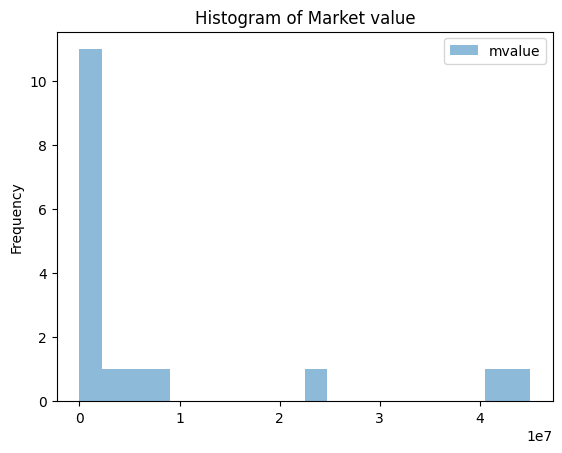

In [11]:
mvalue_agricultura = active_2023q2.loc[active_2023q2['industria'] == "Agricultura, ganadería, aprovechamiento forestal, pesca y caza"]
mvalue_agricultura = mvalue_agricultura[['mvalue']]
mvalue_agricultura.plot.hist(bins = 20, alpha = 0.5, title = "Histogram of Market value")
mvalue_agricultura = mvalue_agricultura[mvalue_agricultura['mvalue']<1e7]
mvalue_agricultura.count()

In [12]:
active_2023q2[['firm', 'mvalue','Empresa','industria']].sort_values(by='mvalue',ascending=False).head(10)


,firm,mvalue,Empresa,industria
1138,AAPL,"3,050,896,326.94",Apple Inc,Industrias manufactureras
316182,MSFT,"2,532,080,938.79",Microsoft Corp,Información en medios masivos
207232,GOOGL,"1,519,830,900.00",Alphabet Inc,"Servicios profesionales, científicos y técnicos"
28396,AMZN,"1,337,539,706.77","Amazon.Com, Inc",Comercio al por menor
338687,NVDA,"1,044,859,400.00",Nvidia Corp,Industrias manufactureras
478367,TSLA,"829,681,140.87","Tesla, Inc",Industrias manufactureras
72866,BRK_A,"750,735,436.68",Berkshire Hathaway Inc,Servicios financieros y de seguros
301173,META,"735,452,839.12","Meta Platforms, Inc","Servicios profesionales, científicos y técnicos"
489577,UNH,"447,491,234.90",Unitedhealth Group Inc,Servicios financieros y de seguros
280653,LLY,"445,190,020.12",Eli Lilly And Company,Industrias manufactureras


In [13]:
active_2023q2[['firm', 'bookvalue','Empresa','industria']].sort_values(by='bookvalue',ascending=False).head(10)

,firm,bookvalue,Empresa,industria
259753,JPM,"13,754,393,805,760,000,000.00",Jpmorgan Chase & Co,Servicios financieros y de seguros
53286,BAC,"8,869,504,413,041,999,872.00",Bank Of America Corp,Servicios financieros y de seguros
79421,C,"5,366,629,639,774,999,552.00",Citigroup Inc,Servicios financieros y de seguros
513136,WFC,"3,179,176,565,760,000,000.00",Wells Fargo & Company,Servicios financieros y de seguros
210557,GS,"2,286,198,491,697,999,872.00","The Goldman Sachs Group, Inc",Servicios financieros y de seguros
315517,MS,"1,238,941,094,049,999,872.00",Morgan Stanley,Servicios financieros y de seguros
72866,BRK_A,"522,546,758,370,000,000.00",Berkshire Hathaway Inc,Servicios financieros y de seguros
381814,PRU,"465,693,779,096,000,000.00","Prudential Financial, Inc",Servicios financieros y de seguros
301078,MET,"438,055,252,573,000,000.00","Metlife, Inc",Servicios financieros y de seguros
492237,USB,"427,109,436,325,000,000.00",US Bancorp,Servicios financieros y de seguros


## 1.3 Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

- How the total market value of the US market has changed over the years? Do a table and/or graph and explain

- How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain


In [14]:
datay=data.loc[data['fiscalmonth']==12]
datay2=data[data['fiscalmonth']==12]
fmarket=datay[['year','mvalue','revenue','netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,380,672,838.05","344,723,426.83"
2001,"11,494,392,671.37","7,493,006,671.41","67,530,325.20"
2002,"9,494,723,157.61","7,320,441,084.79","-57,773,458.77"
2003,"11,675,951,523.21","7,924,776,768.22","364,552,095.88"
2004,"13,230,878,635.88","8,816,237,201.06","431,717,996.76"
2005,"13,789,108,526.52","9,645,438,810.16","522,880,104.83"
2006,"15,461,254,772.55","10,540,362,264.44","657,926,147.83"
2007,"16,149,130,338.06","11,256,645,716.63","610,497,891.61"
2008,"10,395,016,561.41","11,607,977,855.77","342,187,423.38"


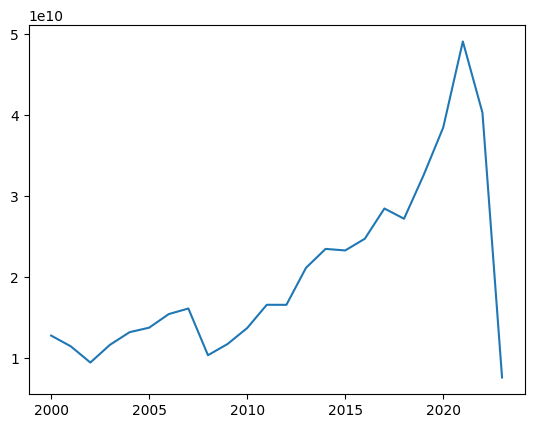

In [15]:
plt.plot(fmarket['mvalue']);

WE CAN SEE THAT OVER TIME THE TOTAL VALUE OF THE MARKET HAS HAD ITS UPS AND DOWNS, THE MINIMUM POINT THAT IS SEEN IN THE LAST PARTS OF THIS GRAPH MAY BE DUE TO THE FACT THAT MANY OF THE LARGE COMPANIES HAVE NOT FINISHED THEIR FISCAL YEAR.

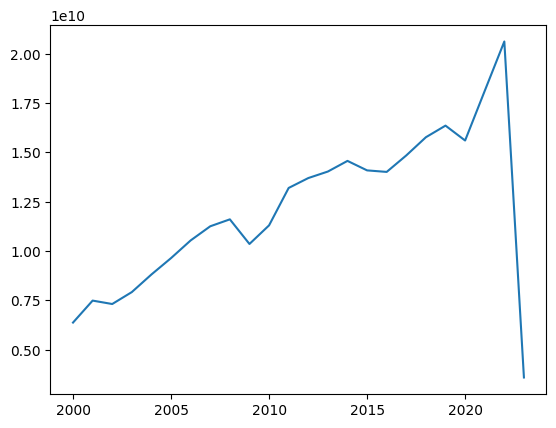

In [16]:
plt.plot(fmarket['revenue']);

WE CAN SEE THAT IN THE REVENUE GRAPH A MORE UNIFORM GROWTH IS SEEN SINCE THIS VARIABLE SYMBOLIZES HOW MUCH MONEY THE COMPANY GENERATES WITHOUT DEDUCTING TAXES, SO IT IS A GROWTH THAT IS NOT SUBJECT TO OTHER VARIABLES AND CHANGES OTHER THAN THE ECONOMIC GROWTH OF THE COUNTRY.

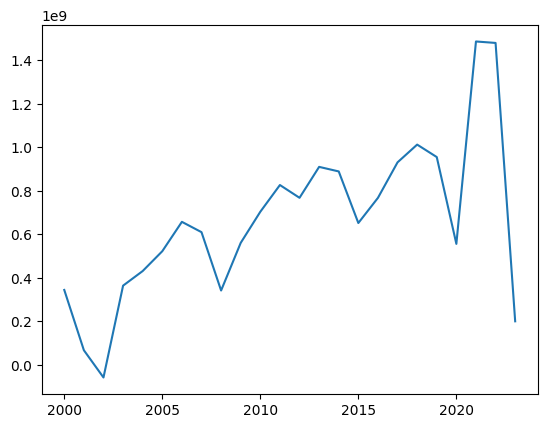

In [17]:
plt.plot(fmarket['netincome']);

IN THE NETINCOME GRAPH YOU CAN SEE THAT IT IS IN A LOWER ORDER OF MAGNITUDE SINCE THIS VARIABLE DEFINES THE MONEY THAT COMPANIES HAVE GENERATED AFTER DEDUCTING TAXES AND OTHER THINGS, WE CAN ALSO SEE THAT THIS VARIABLE DOES NOT HAVE SUCH A UNIFORM GROWTH SINCE IT IS SUBJECT TO MORE CHANGES.

## 1.4 Learing about one industry

Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following:

- Show descriptive statistics for future quarterly log return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:

- Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain

Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following:

- Do histograms for each factor/variables and interpret them

- Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).

- Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.

- You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

- (optional) For each independent variable (variable/ratio) check if winsorization is needed according to very extreme values. You can check this with the histograms of each variable/ratio. If it is necessary do the corresponding adjustments with winsorization to avoid unreliable results in your regression model

- Once you corrected your variables/ratios with winsorization (in case you did it) and addressed possible multicollienarity problems, run a final multiple regression model

Interpret your model

- Interpret with your own words the results of each coefficient (beta and their statistical significance)

- Interpret the R-squared of the model

- Write a conclusion of your results


In [18]:
dataser2022 = data.loc[(data['industria'] == "Industrias manufactureras") & (data['fiscalmonth']==12) & (data['status']=='activo') & (data['year']==2022)]
dataser1 = dataser2022[['firm','rq','ry','revenue','netincome','mvalue','bookvalue','opm','pm','ato','finlev','acidratio']]
dataser1.describe()

,rq,ry,revenue,netincome,mvalue,bookvalue,opm,pm,ato,finlev,acidratio
count,"1,447.00","1,416.00","1,472.00","1,469.00","1,453.00","1,472.00","1,252.00","1,252.00","1,472.00","1,472.00","1,469.00"
mean,-0.08,-0.56,"4,792,123.98","510,356.30","11,463,216.11","419,256,259,608,594.06",-18.03,-18.12,0.61,0.21,5.03
std,0.41,0.78,"21,497,239.45","3,622,327.89","70,614,774.38","4,091,138,963,221,925.50",153.31,154.86,0.66,0.24,6.39
min,-2.57,-4.45,-418.00,"-6,752,000.00","1,845.47","252,175.50","-3,895.75","-3,857.75",-0.01,0.00,0.02
25%,-0.25,-0.93,"8,607.00","-60,806.00","84,561.57","4,025,164,014.50",-0.90,-0.91,0.09,0.03,1.72
50%,-0.03,-0.38,"253,255.55","-8,224.13","661,215.26","90,279,606,159.00",0.02,0.01,0.54,0.15,2.73
75%,0.15,-0.04,"2,082,658.50","127,672.00","3,382,234.75","3,676,665,875,562.00",0.12,0.09,0.91,0.31,5.66
max,2.66,1.39,"413,680,000.00","99,803,000.00","2,220,977,926.40","106,561,288,665,000,000.00",134.87,128.40,13.56,2.76,67.02


In [19]:
datasery = dataser2022[dataser2022['fiscalmonth'] == 12]
datasery[['fiscalmonth', 'revenue']].head()

,fiscalmonth,revenue
91,12.00,"6,848,000.00"
186,12.00,"12,451,000.00"
756,12.00,"222,818.00"
851,12.00,"888,788.00"
1135,12.00,"394,328,000.00"


In [20]:
# Calculo logaritmico de las variables financieras
dataser = datasery.copy()
dataser['logta'] = np.where(dataser['totalassets']==0,np.NaN,np.log(dataser['totalassets']))
dataser['logre'] = np.where(dataser['revenue']==0,np.NaN,np.log(dataser['revenue']))
dataser['lognet'] = np.where(dataser['netincome']==0,np.NaN,np.log(dataser['netincome']))
dataser['logato'] = np.where(dataser['ato']==0,np.NaN,np.log(dataser['ato']))

C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, 

In [40]:

columns = ['logta','logre','lognet','mvalue','bookvalue','opm','pm','logato','finlev','acidratio','f1rq','ry']
correlation_matrix = dataser[columns].corr()

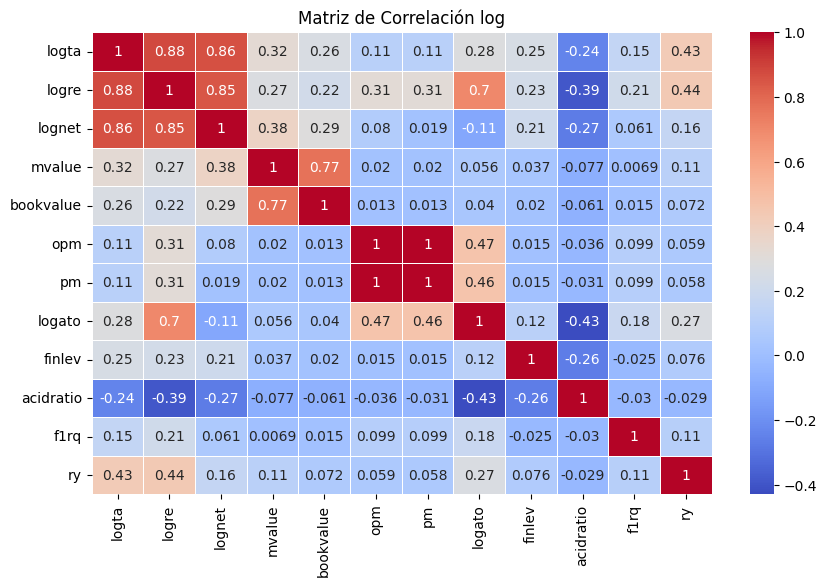

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación log')
plt.show()

THE VARIABLES WITH WHICH THEY HAVE THE MOST RELATIONSHIP WOULD BE THE TOTAL ASSETS, AND THE REVENUE, THIS IS PROBABLY BECAUSE THE PROFITS OF A COMPANY ARE VERY RELATED TO ITS VALUE IN THE MARKET IN THE SAME WAY THE INCOME THAT IT GENERATES.

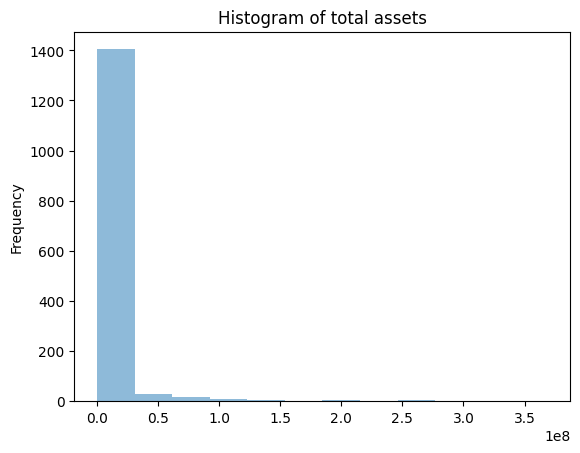

In [23]:
hist=dataser['totalassets'].plot.hist(bins=12,alpha=0.5,title="Histogram of total assets")

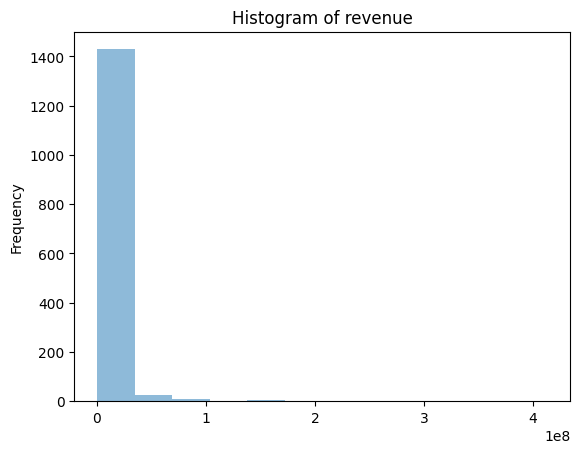

In [24]:
hist=dataser['revenue'].plot.hist(bins=12,alpha=0.5,title="Histogram of revenue")

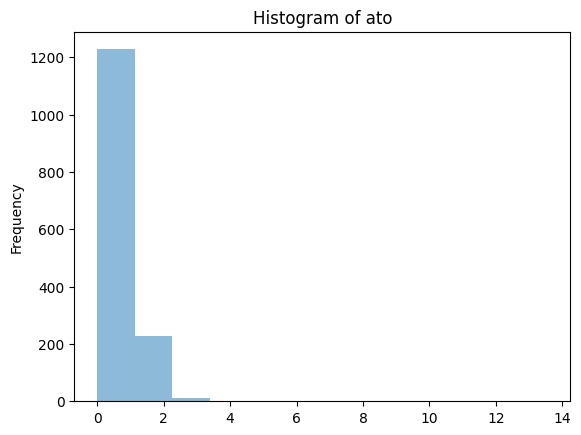

In [25]:
hist=dataser['ato'].plot.hist(bins=12,alpha=0.5,title="Histogram of ato")

WE CAN SEE THAT THE DISTRIBUTION OF THE HISTOGRAMS OF THE VARIABLES THAT HAD THE MOST CORRELATION WITH THE RETURN HAS A SIMILAR DISTRIBUTION

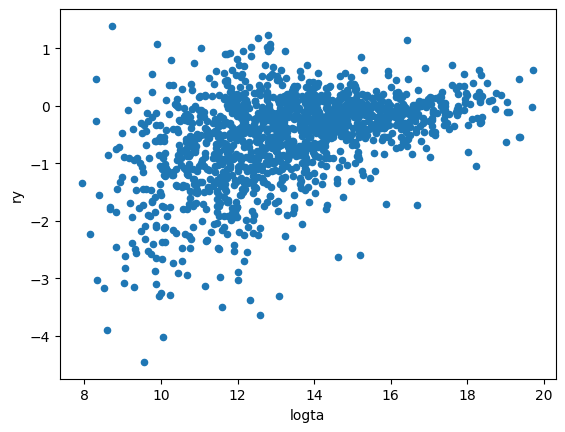

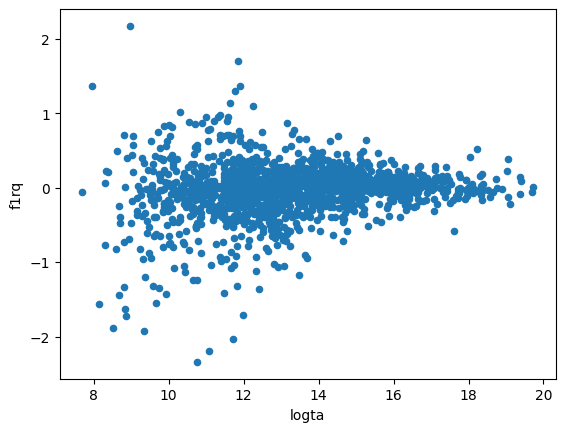

In [26]:
dataser[['logta','ry']].plot.scatter(x = 'logta', y= 'ry');
dataser[['logta','f1rq']].plot.scatter(x = 'logta', y= 'f1rq');


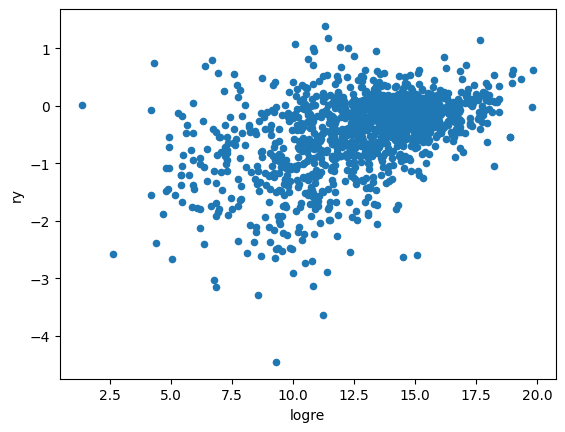

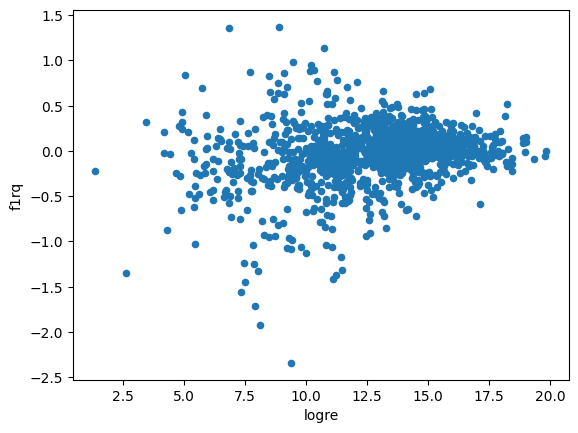

In [27]:
dataser[['logre','ry']].plot.scatter(x = 'logre', y= 'ry');
dataser[['logre','f1rq']].plot.scatter(x = 'logre', y= 'f1rq');


In [37]:
dataser['f1rq'].interpolate(method = 'linear', inplace = True)

X = dataser[['logre', 'logta', 'mvalue', 'ato']]
X = sm.add_constant(X)
X = X.fillna(X.mean())
Y = dataser['f1rq']

mkmodel = sm.OLS(Y, X).fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     13.17
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.52e-10
Time:                        00:45:23   Log-Likelihood:                -613.71
No. Observations:                1472   AIC:                             1237.
Df Residuals:                    1467   BIC:                             1264.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3981      0.059     -6.698      0.0

MULTICOLINEARITY IS A PHENOMENON THAT OCCURS WHEN TWO OR MORE VARIABLES OF OUR MODEL ARE VERY RELATED, WHICH CAN TOO MUCH AFFECT THEIR PREDICTIONS. I BELIEVE THIS HAPPENED SINCE SOME OF THE FINANCIAL RADIOS I USE ARE RELATIONS OF THE VARIABLES NORMAL.

### Conclusion.

IN THIS MODEL WE CAN SEE THAT IF WE SEE WHICH COEFFICIENTS EXCEED THE P VALUES, ONLY ACHIEVEMENT WOULD BE A SIGNIFICANT VARIABLE FOR F1RQ, AND NONE OF THE OTHER VARIABLES WOULD COUNT AS SIGNIFICANT FOR THE RELATION AND THEY WOULD NOT EXCEED ITS PVALUE, IN REGARD TO R -SQUARED TELLS US THAT IT HAS A VARIABILITY OF 3.5% THAT COULD BE REPRESENTED WITH THE CURRENT MODEL, SO IN CONCLUSION THE VARIABLES BEING CONSIDERED ARE NOT SUITABLE FOR ANALYSIS OR PREDICTIONS OF F1RQ